<a href="https://colab.research.google.com/github/artjow/-/blob/main/%EA%B8%B0%EC%82%AC_%EC%A0%9C%EB%AA%A9_%ED%81%AC%EB%A1%A4%EB%A7%81%EC%9D%84_%ED%86%B5%ED%95%9C_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EC%8B%9C%EA%B0%81%ED%99%94%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://durian9s-coding-tree.tistory.com/19

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 10.1 MB/s 
     |████████████████████████████████| 448 kB 72.8 MB/s 
     |████████████████████████████████| 86 kB 6.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [2]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import nltk 
from konlpy.tag import Kkma
from konlpy.tag import Twitter
from wordcloud import WordCloud

In [3]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq  #코랩에서 한글 표기를 위해 폰트 설치(리눅스)

Selecting previously unselected package fonts-nanum.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
date='20210324' 
#일자는 변경해 주면 되며, 코드 상 3월24일의 네이버 뉴스 랭킹의 기사제목을 뽑아온다.
news_url = 'https://news.naver.com/main/ranking/popularDay.nhn?date={}'.format(date)


headers = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
req = requests.get(news_url, headers = headers)
#  headers = headers 이것도 한참 애먹었었다. 왜 안되지? 라고 생각하면서 계속 구글링을 해보니 네이버에서 막은것이었다.
# 일명 안티 크롤링
soup = BeautifulSoup(req.text, 'html.parser')
news_titles = soup.select('.rankingnews_box > ul > li > div > a')

crowled_title = []
for i in range(len(news_titles)):
    crowled_title.append(news_titles[i].text)
    print(i+1, news_titles[i].text) # 기사 제목 리스트 저장하기

1 15살 고교생까지 죽어가는데···최고사령관 아들 리조트서 성대한 파티
2 애 낳은 적 없다던 구미 여아 친모, 스마트폰엔 '출산 준비' 검색
3 "양심선언해야" 文 대통령 백신 접종 간호사 향한 '협박' 논란
4 음란행위 하며 여성 괴롭힌 40대…문 닫고 버틴 버스기사가 잡아
5 '렉스턴 욕설 논란' 대구 식당에 쏟아진 별점 테러…일각선 "지나쳤다"
6 [단독]“LH직원들, 지방 정착용 특공아파트 113채 전매 차익”
7 윤석열 사퇴- LH분노 시너지, 여권 전례없는 위기 불렀나
8 “구미 3세여아 친모 진료기록 찾아라” 산부인과 170여곳 압수수색나선 경찰
9 민주당 “지금은 비상 상황”… 박원순 옹호하면서까지 지지층 결집
10 6억이하 아파트도 공시가 급등 후폭풍… 재산세 ‘반짝감면’ 뒤 껑충
11 [사건의 재구성]고시원 가장 죽어갈 때…2차살인 도구 사러 마트 간 '악마'
12 혼자 아이 낳았나…구미 3세아 친모, 회사PC로 '셀프출산' 검색
13 국민연금, 조원태 한진그룹 회장 재선임 '반대' 결정
14 서울시장, 여론조사와 다르다?…투표장, 누가 많이 가느냐 싸움
15 이준석 "김종인, 신성로마제국 황제의 리더십…윤석열 접촉1순위, 金"
16 문 대통령 '주사기 바꿔치기' 의혹?..."허위 조작 정보"
17 "조민 부산대 의전원 입학 취소 가능"...의사 면허도 취소될까?
18 집에 있던 7살 소녀에도 총격..."미성년자 최소 20명 사망"
19 구미 여아 친모, 3년 전 출산 앞두고 '셀프 출산' 검색
20 배로 가득했던 베네치아 운하서 돌고래 발견...'코로나의 역설?'
21 文 백신 주사기 뚜껑 어땠길래…화이자 바꿔치기 논란
22 [단독]의문의 알약 6개…동부구치소 '양반다리 사망' 미스터리
23 [더오래]친구 셋과 자전거 국토 종주 떠났다 혼자 돌아온 아들
24 [단독]러시아 알바생만 노렸다…새벽, 테슬라 타고 온 바바리맨
25 "내 인생 망칠까봐" 몰카 고소 취하한 정준영 前여친의 후회
26 [단독] 4년 전 건물 지어놓고…박형준 부인의 

In [5]:
title = "".join(crowled_title)

filtered_title = title.replace('.', ' ').replace('"',' ').replace(',',' ').replace("'"," ").replace('·', ' ').replace('=',' ').replace('\n',' ')

filtered_title

'15살 고교생까지 죽어가는데   최고사령관 아들 리조트서 성대한 파티애 낳은 적 없다던 구미 여아 친모  스마트폰엔  출산 준비  검색 양심선언해야  文 대통령 백신 접종 간호사 향한  협박  논란음란행위 하며 여성 괴롭힌 40대…문 닫고 버틴 버스기사가 잡아 렉스턴 욕설 논란  대구 식당에 쏟아진 별점 테러…일각선  지나쳤다 [단독]“LH직원들  지방 정착용 특공아파트 113채 전매 차익”윤석열 사퇴- LH분노 시너지  여권 전례없는 위기 불렀나“구미 3세여아 친모 진료기록 찾아라” 산부인과 170여곳 압수수색나선 경찰민주당 “지금은 비상 상황”… 박원순 옹호하면서까지 지지층 결집6억이하 아파트도 공시가 급등 후폭풍… 재산세 ‘반짝감면’ 뒤 껑충[사건의 재구성]고시원 가장 죽어갈 때…2차살인 도구 사러 마트 간  악마 혼자 아이 낳았나…구미 3세아 친모  회사PC로  셀프출산  검색국민연금  조원태 한진그룹 회장 재선임  반대  결정서울시장  여론조사와 다르다?…투표장  누가 많이 가느냐 싸움이준석  김종인  신성로마제국 황제의 리더십…윤석열 접촉1순위  金 문 대통령  주사기 바꿔치기  의혹?    허위 조작 정보  조민 부산대 의전원 입학 취소 가능    의사 면허도 취소될까?집에 있던 7살 소녀에도 총격    미성년자 최소 20명 사망 구미 여아 친모  3년 전 출산 앞두고  셀프 출산  검색배로 가득했던 베네치아 운하서 돌고래 발견    코로나의 역설? 文 백신 주사기 뚜껑 어땠길래…화이자 바꿔치기 논란[단독]의문의 알약 6개…동부구치소  양반다리 사망  미스터리[더오래]친구 셋과 자전거 국토 종주 떠났다 혼자 돌아온 아들[단독]러시아 알바생만 노렸다…새벽  테슬라 타고 온 바바리맨 내 인생 망칠까봐  몰카 고소 취하한 정준영 前여친의 후회[단독] 4년 전 건물 지어놓고…박형준 부인의  수상한  미등기리얼미터  서울시장 후보 지지도  오세훈 48 9% 박영선 29 2%  소방차 앞길 막지 마세요…이제는 밀어버립니다 [이슈톡] 임신 27주 여성 묻지마

In [6]:
tw = Twitter() # Twitter가 Okt로 변경되었다고 코랩이가 말해줬다.



tokens_ko = tw.nouns(filtered_title)

tokens_ko

ko = nltk.Text(tokens_ko, name='기사 내 명사')

ko.tokens

ko.vocab()

new_ko=[]
for word in ko:
  if len(word) > 1 and word != '단독' and  word != ' ':
        new_ko.append(word)

new_ko

ko = nltk.Text(new_ko, name = '기사 내 명사 두 번째')

ko.tokens

ko.vocab()

data = ko.vocab().most_common(150)

data = dict(data)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


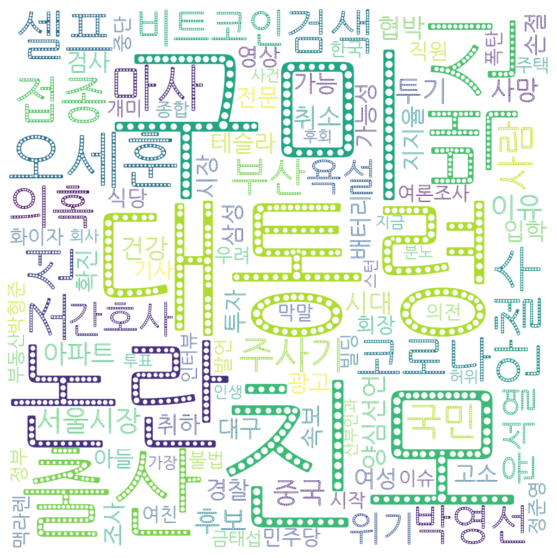

In [7]:
wordcloud = WordCloud().generate(filtered_title)

font = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

wc = WordCloud(font_path=font,\
		background_color="white", \
		width=1000, \
		height=1000, \
		max_words=100, \
		max_font_size=300)
wc = wc.generate_from_frequencies(data)

plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
from wordcloud import WordCloud

wc = WordCloud(font_path='C:\\Windows\\Fonts\\08SeoulNamsanB_0.ttf', \
	background_color="white", \
	width=1000, \
	height=1000, \
	max_words=100, \
	max_font_size=300)

In [11]:
from konlpy.tag import Twitter
from collections import Counter

In [12]:
file = open("/content/Data visualization example.txt", 'r') 
lists = file.readlines() 
file.close() 
lists

['Q4. 가장 선호하는 이미지 및 그 이유\t\t\n',
 'No\t이유\t\n',
 '1\t4\t익숙함\n',
 '2\t42\t작가의 의도와 인공지능의 우연의 결합\n',
 '3\t14\t경계가 모호한 세상에 있는 듯한 느낌이 좋아서요.\n',
 '4\t2\t예뻐요\n',
 '5\t72\t그림이미지 완성도가 높다\n',
 '6\t90\t작가의 기존 작업의 느낌이 가장 유지되면서 새로운 이미지로 보이기 때문에\n',
 '7\t2\t작품 이미지가 잔상에 깊게 남아서\n',
 '8\t32\t작가 진술과 맥락이 잘 맞는 것 같다고 생각하며 학습 중 우연이겠지만 가면의 형상이 욕망이라는 검은 덩어리와 엮이며 섞이는 것이 묘한 느낌을 보여주는 것 같다.\n',
 '9\t\t패쓰\n',
 '10\t24\t작가의 한계를 넘었다.\n',
 '11\t25\t작가의 진술을 반영하여 표현된 생성물의 느낌이 감정적으로 다가온다. 작가의 잘 정제된 표현과 달리 허물어진 형상성이 강한 인상을 준다.\n',
 '12\t36\t작업 밀도가 우수하다\n',
 '13\t\t패쓰\n',
 '14\t26\t인간 삶의 다양성 변화가 느껴져서\n',
 '15\t43\t원작과 같은 흐름이면서도 다른 스타일이 새롭다.\n',
 '16\t28\t알수 없는 그림이 신비롭게 느껴져서\n',
 '17\t2\t꽃이 진짜 같아요.\n',
 '18\t36\t다양한 이미지가 스토리처럼 느껴짐\n',
 '19\t42\t\n',
 '20\t44\t원작가의 작품을 보고 원작과 다른 작품으로 느껴져서\n',
 '21\t62\t멀리서 보면 사진 같은데 가까이서 보면 실제와는 다른 이미지인 것이 흥미롭고 신기했고 노을이 떠오르는 색감이 예뻐 보였다.\n',
 '22\t32\t익살스러우면서도 즐거운 느낌이 좋다. 슬픔이 있는 듯해도 그래도 즐거운 마음을 갖게 되는 모습\n',
 '23\t48\t\n',
 '24\t80\t기억에 남아서\n',
 '25\t97\t현재 우리의 복잡한 삶의 생각을 느끼게 한다.\n',
 '26\t2\

In [13]:
twitter = Twitter()
morphs = []
for sentence in lists:
  morphs.append(twitter.pos(sentence))
print(morphs)

[[('Q', 'Alpha'), ('4', 'Number'), ('.', 'Punctuation'), ('가장', 'Noun'), ('선호', 'Noun'), ('하는', 'Verb'), ('이미지', 'Noun'), ('및', 'Noun'), ('그', 'Noun'), ('이유', 'Noun'), ('\t\t\n', 'Foreign')], [('No', 'Alpha'), ('\t', 'Foreign'), ('이유', 'Noun'), ('\t\n', 'Foreign')], [('1', 'Number'), ('\t', 'Foreign'), ('4', 'Number'), ('\t', 'Foreign'), ('익숙함', 'Adjective'), ('\n', 'Foreign')], [('2', 'Number'), ('\t', 'Foreign'), ('42', 'Number'), ('\t', 'Foreign'), ('작가', 'Noun'), ('의', 'Josa'), ('의도', 'Noun'), ('와', 'Josa'), ('인공', 'Noun'), ('지능', 'Noun'), ('의', 'Josa'), ('우연', 'Noun'), ('의', 'Josa'), ('결합', 'Noun'), ('\n', 'Foreign')], [('3', 'Number'), ('\t', 'Foreign'), ('14', 'Number'), ('\t', 'Foreign'), ('경계', 'Noun'), ('가', 'Josa'), ('모호한', 'Adjective'), ('세상', 'Noun'), ('에', 'Josa'), ('있는', 'Adjective'), ('듯', 'Noun'), ('한', 'Josa'), ('느낌', 'Noun'), ('이', 'Josa'), ('좋아서요', 'Adjective'), ('.', 'Punctuation'), ('\n', 'Foreign')], [('4', 'Number'), ('\t', 'Foreign'), ('2', 'Number'), ('\t', 'F

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [17]:
noun_adj_adv_list=[] 

for sentence in morphs : 
   for word, tag in sentence : 
     if tag in ['Noun'] and ("것" not in word) and ("내" not in 
word)and ("나" not in word)and ("수"not in word) and("게"not in 
word)and("말"not in word): 
        noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)


['가장', '선호', '이미지', '및', '그', '이유', '이유', '작가', '의도', '인공', '지능', '우연', '결합', '경계', '세상', '듯', '느낌', '그림', '이미지', '완성', '도', '작가', '기존', '작업', '느낌', '가장', '유지', '이미지', '때문', '작품', '이미지', '잔', '남아', '작가', '진술', '맥락', '생각', '학습', '중', '우연', '가면', '형상', '욕망', '덩어리', '엮', '묘', '느낌', '패쓰', '작가', '한계', '작가', '진술', '반영', '표현', '생', '물의', '느낌', '감정', '작가', '정제', '표현', '달리', '허물', '어진', '형상', '인상', '작업', '밀도', '패쓰', '인간', '삶', '다양성', '변화', '원작', '다른', '스타일', '그림', '꽃', '진짜', '이미지', '스토리', '작가', '작품', '보고', '원작', '다른', '작품', '멀리', '사진', '가까이', '실제', '다른', '이미지', '흥미', '노을', '색감', '느낌', '슬픔', '듯', '마음', '모습', '기억', '남아', '현재', '우리', '삶', '생각', '색깔', '장미', '인공', '지능', '작가', '성향', '변화', '비', '대칭', '개', '캐릭터', '대비', '표정', '매력', '이미지', '시선', '강탈', '사이버', '색감', '재개발', '우울함', '시선', '작품', '컬러', '조합', '색감', '바다', '하늘', '모습', '마음속', '응어리', '느낌', '상처', '손짓', '표현', '느낌', '꽃', '만발', '사람', '그린', '느낌', '임', '색감', '기존', '작가', '스타일', '기존', '작가', '스타일', '연장', '선의', '작업', '색감', '그림', '체', '선택', '가장', '눈', '색감', '활

In [18]:
count = Counter(noun_adj_adv_list)


In [19]:
words = dict(count.most_common())


In [20]:
words

{'가까이': 1,
 '가면': 1,
 '가장': 3,
 '감정': 1,
 '강탈': 1,
 '개': 1,
 '결합': 1,
 '경계': 1,
 '공간': 1,
 '그': 1,
 '그린': 1,
 '그림': 3,
 '기억': 1,
 '기존': 3,
 '꽃': 2,
 '남아': 2,
 '노을': 1,
 '눈': 1,
 '느낌': 9,
 '다른': 3,
 '다양성': 1,
 '달리': 1,
 '대비': 1,
 '대칭': 1,
 '덩어리': 1,
 '도': 1,
 '듯': 2,
 '때문': 1,
 '마음': 1,
 '마음속': 1,
 '만발': 1,
 '매력': 1,
 '맥락': 1,
 '멀리': 1,
 '모습': 2,
 '몰입': 1,
 '묘': 1,
 '물의': 1,
 '밀도': 1,
 '및': 1,
 '바다': 1,
 '반영': 1,
 '변화': 2,
 '보고': 1,
 '비': 1,
 '사람': 1,
 '사이버': 1,
 '사진': 1,
 '삶': 2,
 '상처': 1,
 '색감': 6,
 '색깔': 1,
 '생': 1,
 '생각': 2,
 '선의': 1,
 '선택': 1,
 '선호': 1,
 '성향': 1,
 '세상': 1,
 '손짓': 1,
 '스타일': 3,
 '스토리': 1,
 '슬픔': 1,
 '시선': 2,
 '실제': 1,
 '어진': 1,
 '엮': 1,
 '연장': 1,
 '완성': 1,
 '욕망': 1,
 '우리': 1,
 '우연': 2,
 '우울함': 1,
 '원작': 2,
 '유지': 1,
 '응어리': 1,
 '의도': 1,
 '이미지': 8,
 '이유': 2,
 '인간': 1,
 '인공': 2,
 '인상': 1,
 '임': 1,
 '작가': 10,
 '작업': 3,
 '작품': 4,
 '잔': 1,
 '장미': 1,
 '재개발': 1,
 '정제': 1,
 '조합': 1,
 '중': 1,
 '지능': 2,
 '진술': 2,
 '진짜': 1,
 '체': 1,
 '캐릭터': 1,
 '컬러': 1,
 '패쓰': 2,
 '표정': 1,
 '표

In [21]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [22]:
%matplotlib inline 

import matplotlib 
from IPython.display import set_matplotlib_formats 
matplotlib.rc('font',family = 'Malgun Gothic') 

set_matplotlib_formats('retina') 

matplotlib.rc('axes',unicode_minus = False)

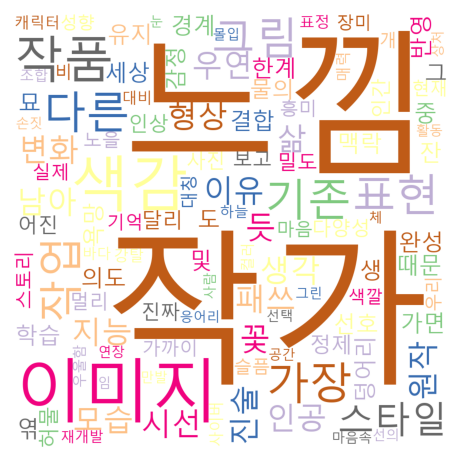

In [37]:
wordcloud = WordCloud(font_path = '/content/Malgun-Gothic.ttf', 
background_color='white',colormap = "Accent_r", 
                    width=1000, 
height=1000).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()